In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv("/content/drive/MyDrive/Zeotap/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Zeotap/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zeotap/Transactions.csv")

In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [6]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [12]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

In [13]:
customers['SignupDate'].head()

,SignupDate
0,2022-07-10
1,2022-02-13
2,2024-03-07
3,2022-10-09
4,2022-08-15


In [14]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [15]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [17]:
merged_data.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
CustomerName,0
Region,0
SignupDate,0


CUSTOMER DEMOGRAPHICS


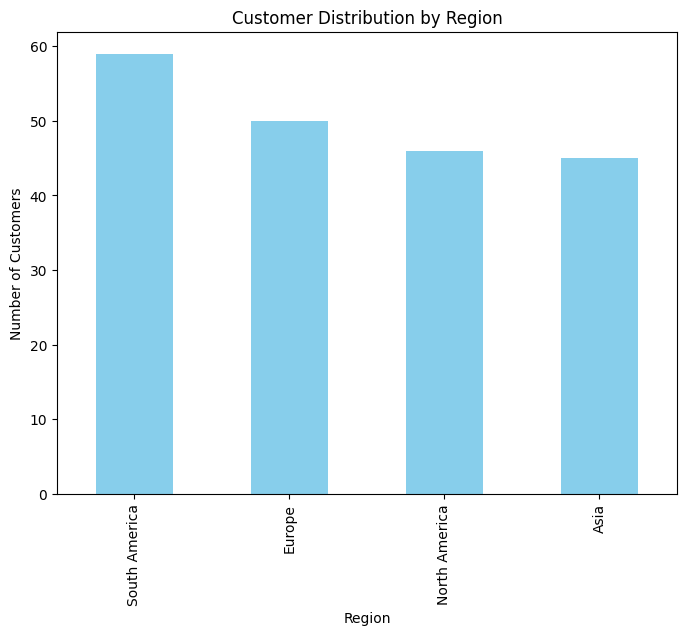

In [18]:
customer_region_count = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
customer_region_count.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

TOP SELLING PRODUCTS

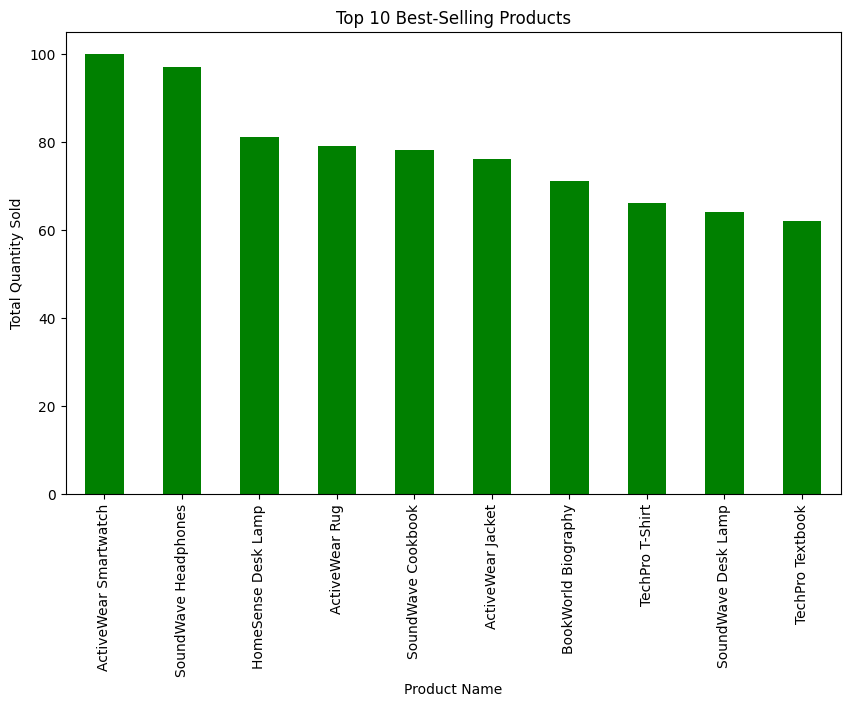

In [19]:
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

REVENUE BY CATEGORY

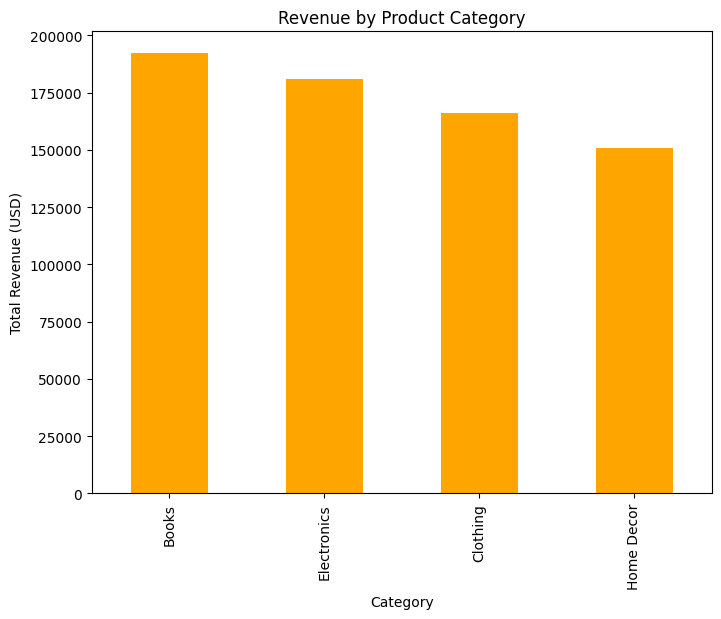

In [20]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.show()

SALES TREND

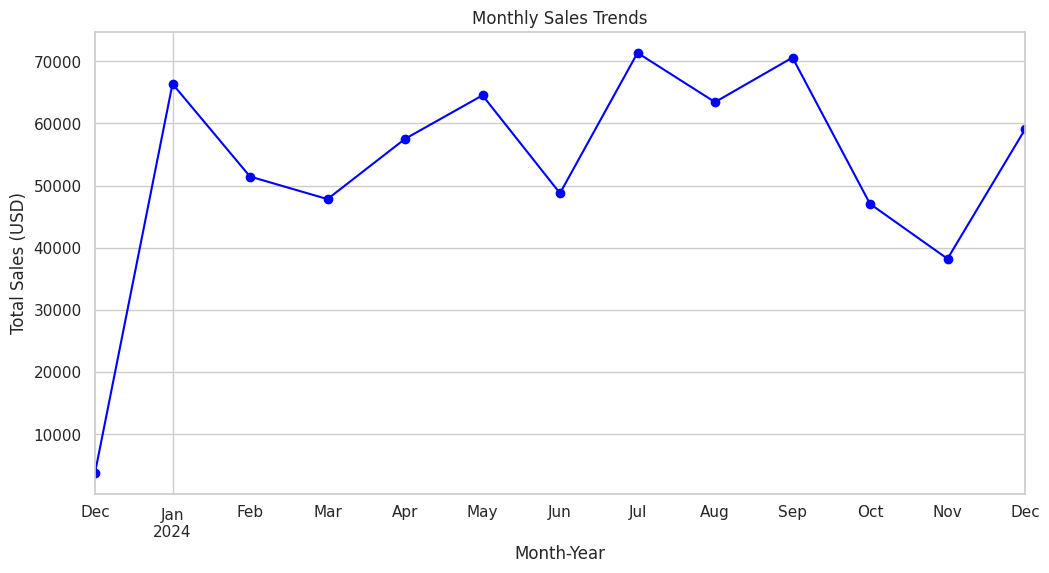

In [24]:
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
sales_trends = merged_data.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()

In [22]:
sns.set(style="whitegrid")

TOP CUSTOMERS

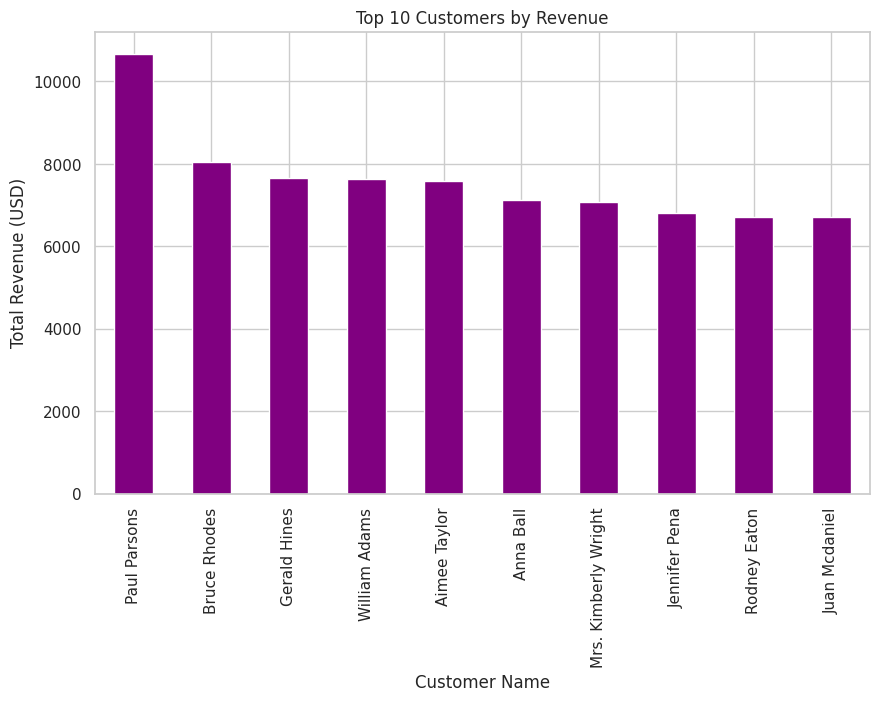

In [23]:
customer_revenue = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
customer_revenue.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue (USD)')
plt.show()


CUSTOMER RETENTION BY SIGNUP YEAR

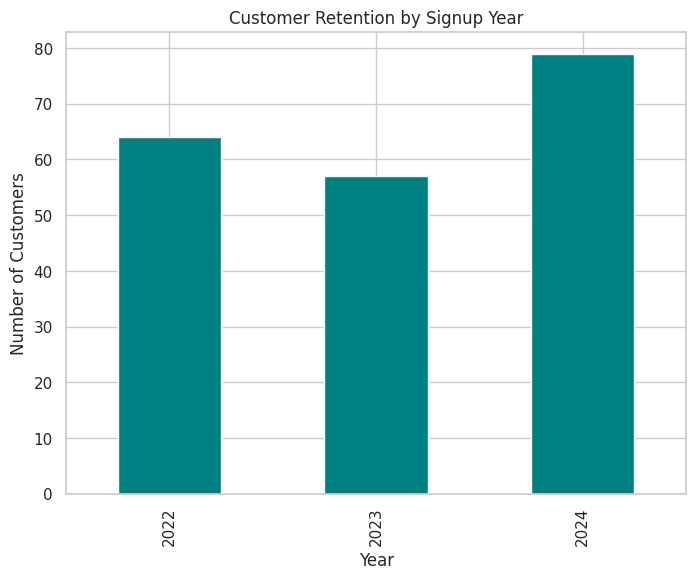

In [25]:
customers['SignupYear'] = customers['SignupDate'].dt.year
retention_by_year = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
retention_by_year.plot(kind='bar', color='teal')
plt.title('Customer Retention by Signup Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()

In [27]:
purchase_frequency = merged_data.groupby('CustomerID')['TransactionID'].count().mean()
print(f"The average purchase frequency per customer is {purchase_frequency:.2f} transactions.")

The average purchase frequency per customer is 5.03 transactions.


In [28]:
average_order_value = merged_data['TotalValue'].mean()
print(f"The average order value is ${average_order_value:.2f}.")

The average order value is $690.00.


In [29]:
customer_revenue_total = merged_data.groupby('CustomerID')['TotalValue'].sum()
customer_revenue_total_sorted = customer_revenue_total.sort_values(ascending=False)
top_20_percent_cutoff = int(0.2 * len(customer_revenue_total_sorted))
top_20_percent_revenue = customer_revenue_total_sorted[:top_20_percent_cutoff].sum()
percentage_revenue = (top_20_percent_revenue / customer_revenue_total_sorted.sum()) * 100
print(f"The top 20% of customers contribute {percentage_revenue:.2f}% of the total revenue.")

The top 20% of customers contribute 35.14% of the total revenue.


In [30]:
customer_revenue_total = merged_data.groupby('CustomerID')['TotalValue'].sum()
customer_revenue_total_sorted = customer_revenue_total.sort_values(ascending=False)
top_20_percent_cutoff = int(0.5 * len(customer_revenue_total_sorted))
top_20_percent_revenue = customer_revenue_total_sorted[:top_20_percent_cutoff].sum()
percentage_revenue = (top_20_percent_revenue / customer_revenue_total_sorted.sum()) * 100
print(f"The top 50% of customers contribute {percentage_revenue:.2f}% of the total revenue.")

The top 50% of customers contribute 70.78% of the total revenue.


In [31]:
customer_revenue_total = merged_data.groupby('CustomerID')['TotalValue'].sum()
customer_revenue_total_sorted = customer_revenue_total.sort_values(ascending=False)
top_20_percent_cutoff = int(0.35 * len(customer_revenue_total_sorted))
top_20_percent_revenue = customer_revenue_total_sorted[:top_20_percent_cutoff].sum()
percentage_revenue = (top_20_percent_revenue / customer_revenue_total_sorted.sum()) * 100
print(f"The top 35% of customers contribute {percentage_revenue:.2f}% of the total revenue.")

The top 35% of customers contribute 55.16% of the total revenue.
